In [12]:
# this is clean version of medata file

In [13]:
# !pip install diophantine

In [14]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

from mavi.vanishing_ideal import VanishingIdeal

In [15]:
# import sequences
import pandas as pd

sys.path.append('../../ProGED_oeis/')
import exact_ed as ed

seq_id = 'A000004'
# seq_id = 'A000008'
seq_id = 'A000027'
# seq_id = 'A000034'
seq_id = 'A000045'
# seq_id = 'A000124'
# seq_id = 'A000008'

n_of_terms_load = 100000
n_of_terms_load = 10
n_of_terms_load = 40
csv_filename = '../../ProGED_oeis/linear_database_newbl.csv'
csv = pd.read_csv(csv_filename, low_memory=False, usecols=[seq_id])[:n_of_terms_load]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


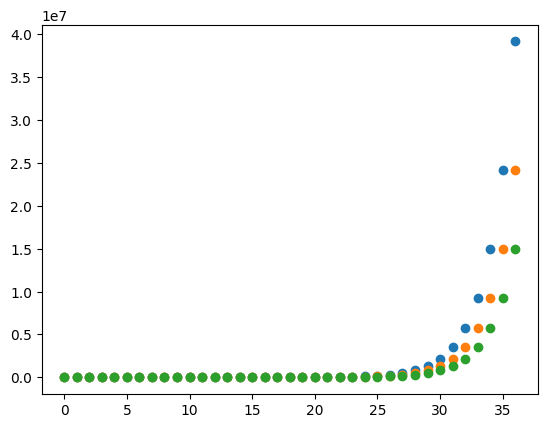

In [16]:
seq, coeffs, truth = ed.unpack_seq(seq_id, csv)
print(seq[:20])  
b, A, sol_ref = ed.dataset(list(seq), d_max=1, max_order=2, library='n')  # or library='lin'. Others are useless (depend on d_max).

# eed:  something to compare to.
x = ed.diophantine_solve(A, b)

# mavi:
data = np.concatenate((b, A), axis=1)
# print(data[:10, :])
# 1/0

# an, 1, n, an1, an2, ...
mold = [0,      3, 4]
data = data[:, mold]
data = data.astype('float')
plt.plot(data, 'o')

In [17]:
vi = VanishingIdeal()
vi.fit(data, 0.01, method="grad", max_degree=2)

In [20]:
import sympy as sp

# an, one, n, an1, an2, an3, an4, an5 = sp.abc.symbols('a(n), 1, n, a(n-1), a(n-2), a(n-3), a(n-4), a(n-5)')
an, one, n, an1, an2, an3, an4, an5 = sp.symbols('a(n), 1, n, a(n-1), a(n-2), a(n-3), a(n-4), a(n-5)')
X_symb = np.array([[an, one, n, an1, an2, an3, an4, an5]])
X_symb = X_symb[:, mold]
print(mold)
print(X_symb)

G = vi.evaluate(X_symb, target='vanishing')  # (1, 6) array
G = np.ravel(G)
# vi.plot(data, splitshow=True)  # fails in more than 2 dims.

[0, 3, 4]
[[a(n) a(n-1) a(n-2)]]


In [24]:
from IPython.display import display
import mavi_eed_utils as mu
import importlib
importlib.reload(mu)

if seq_id == 'A000045':
    print('Candidate equations for Fibonacci sequences:\n')
for i, g in enumerate(G):
    print(f'vanishing polynomial #{i}')
    # display(g)
    g = sp.expand(g)
    display(mu.simpl_disp(g, verbosity=0, num_digits=2, epsilon=1e-10)[0])
    print('')

Candidate equations for Fibonacci sequences:

vanishing polynomial #0


Eq(-1.0e-10*a(n) + 2.0e-10*a(n-1), 0)


vanishing polynomial #1


Eq(1.0e-6*a(n) - 1.0e-6*a(n-1) - 1.0e-6*a(n-2), 0)


vanishing polynomial #2


Eq(-0.0002*a(n) + 0.0002*a(n-1) + 0.0002*a(n-2), 0)


vanishing polynomial #3


Eq(-5.0e-7*a(n) + 5.0e-7*a(n-1) + 5.0e-7*a(n-2), 0)

In [22]:
# Results

# success !!!: fibo:
# -an + an1 + an2 = 0
# an = an1 + an2

# A000124: ground truth: an = 1/2 * n(n-1) + 1
""" wrong data used:
#  4 - n = a(n) * (n + 1 )
# (4 - n)/(n+1) = a(n) 
# -a(n) (n - 1 ) - n + 4 = 0
"""
# 2an**2 - 3an * n - 2an + 2n2 - 2n + 3 = 0
# an(2an - 3 n - 2) = 2n - 2n2 - 3
# an(2an - 3 n - 2) = 2n(1 - n) - 3 
# 

# success: A000037: truth an = n (( 1, 2, 3, 4, 5 ...))
# -a(n) + n + 1 = 0
# a(n) =  n + 1




' wrong data used:\n#  4 - n = a(n) * (n + 1 )\n# (4 - n)/(n+1) = a(n) \n# -a(n) (n - 1 ) - n + 4 = 0\n'